In [9]:
# Import necessary libraries
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize BigQuery client
client = bigquery.Client()

# 1: Top 10 Hospitals with Highest Average Readmission Ratio

                  facility_name  avg_readmission_ratio
0        ST MARY MEDICAL CENTER               1.057900
1       MEMORIAL MEDICAL CENTER               1.038250
2       GOOD SAMARITAN HOSPITAL               1.037833
3      ST MARY'S MEDICAL CENTER               1.032950
4             ST LUKES HOSPITAL               1.019946
5           HOLY CROSS HOSPITAL               1.002025
6  SAINT FRANCIS MEDICAL CENTER               1.000625
7                MERCY HOSPITAL               0.992062
8          MERCY MEDICAL CENTER               0.987920


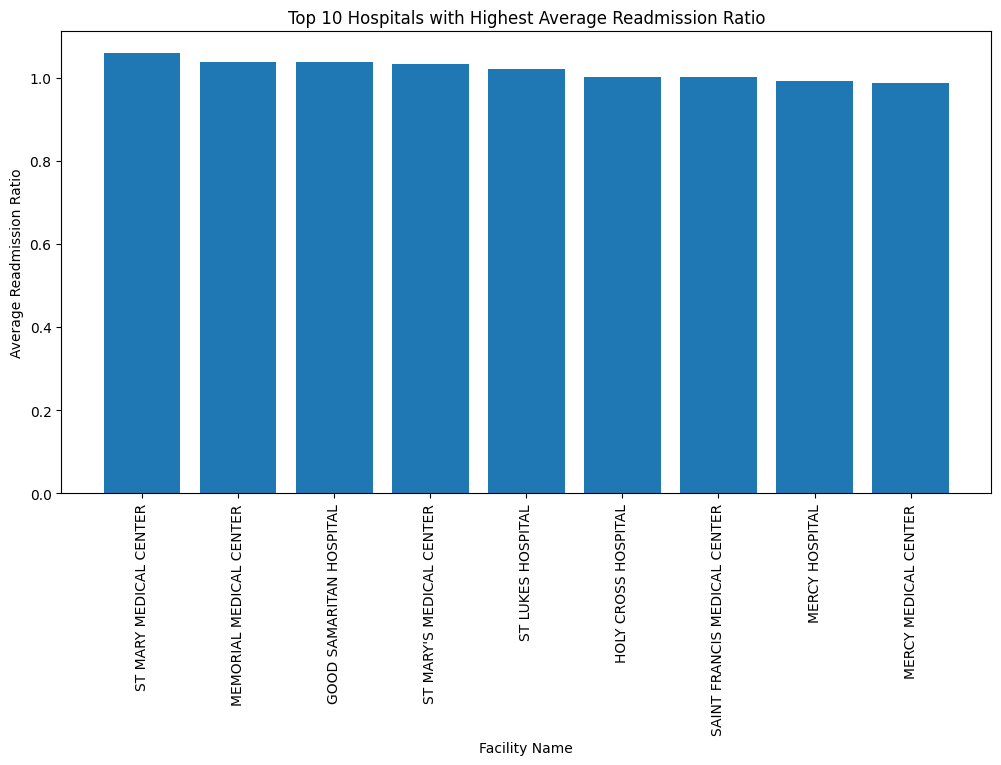

In [5]:
# Perform SQL query
query = """
SELECT
    facility_name,
    AVG(excess_readmission_ratio) as avg_readmission_ratio
FROM
    `named-vine-254515.processed_data.us_hospital_readmissions_partitioned`
GROUP BY
    facility_name
HAVING
    COUNT(*) > 10
ORDER BY
    avg_readmission_ratio DESC
LIMIT 10;
"""

# Execute query and load results into DataFrame
df = client.query(query).to_dataframe()
print(df)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['facility_name'], df['avg_readmission_ratio'])
plt.title('Top 10 Hospitals with Highest Average Readmission Ratio')
plt.xlabel('Facility Name')
plt.ylabel('Average Readmission Ratio')
plt.xticks(rotation=90)
plt.show()

# 2: Top 10 hospitals with lowest average readmission ratio

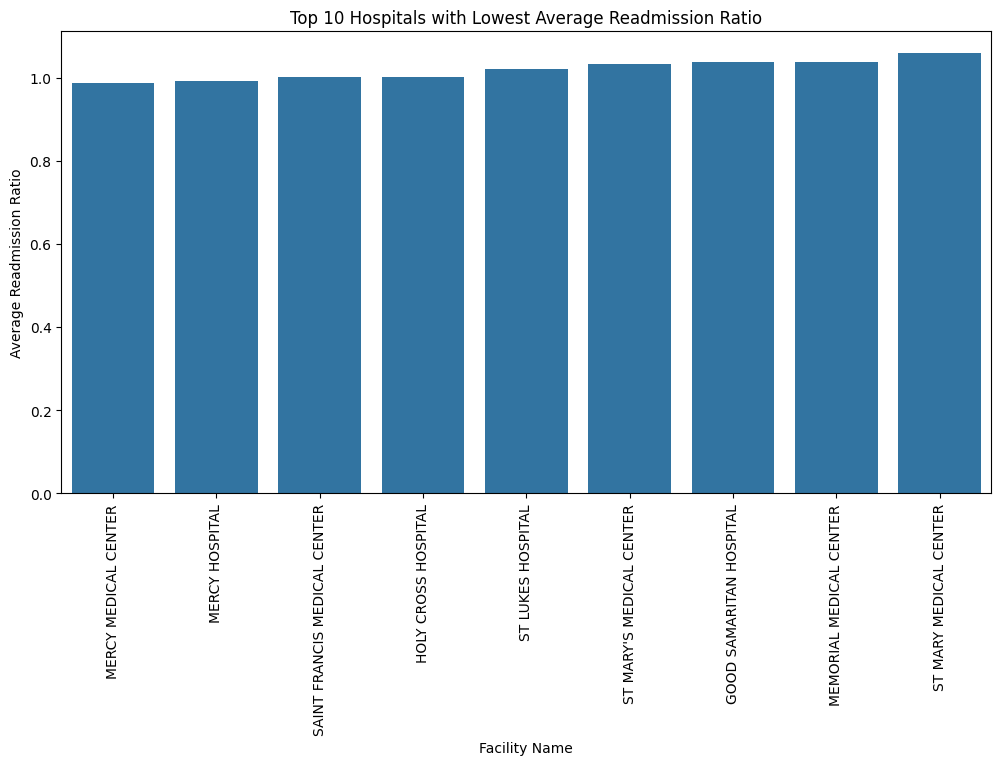

In [12]:
# Top 10 hospitals with lowest average readmission ratio
query_bottom_10 = """
SELECT
    facility_name,
    AVG(excess_readmission_ratio) AS avg_readmission_ratio
FROM
    `named-vine-254515.processed_data.us_hospital_readmissions_partitioned`
GROUP BY
    facility_name
HAVING
    COUNT(*) > 10
ORDER BY
    avg_readmission_ratio ASC
LIMIT 10;
"""
df_bottom_10 = client.query(query_bottom_10).to_dataframe()

plt.figure(figsize=(12, 6))
sns.barplot(x='facility_name', y='avg_readmission_ratio', data=df_bottom_10)
plt.title('Top 10 Hospitals with Lowest Average Readmission Ratio')
plt.xlabel('Facility Name')
plt.ylabel('Average Readmission Ratio')
plt.xticks(rotation=90)
plt.show()

# 3: Correlation between predicted and actual readmission rates

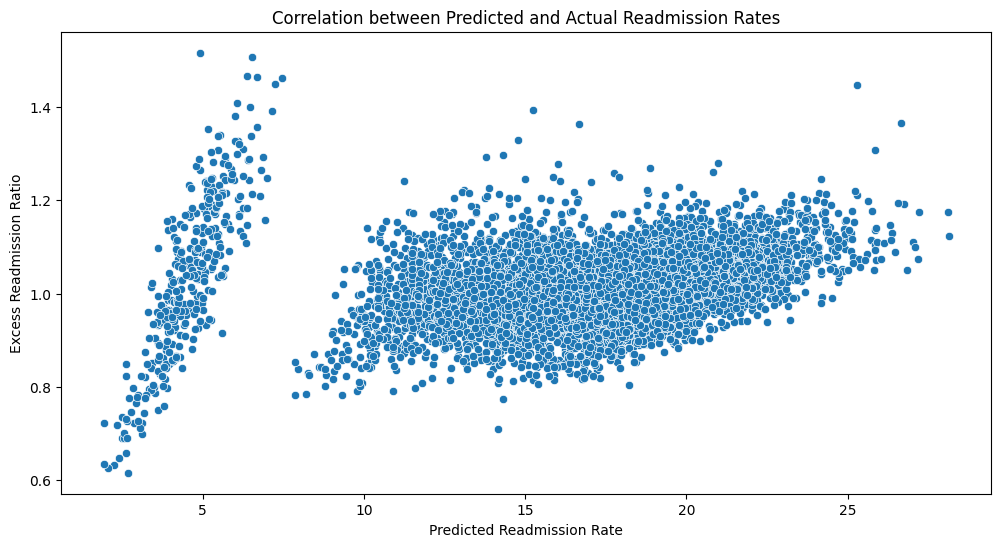

In [10]:
# Correlation between predicted and actual readmission rates
query_correlation = """
SELECT
    predicted_readmission_rate,
    excess_readmission_ratio
FROM
    `named-vine-254515.processed_data.us_hospital_readmissions_partitioned`;
"""
df_correlation = client.query(query_correlation).to_dataframe()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='predicted_readmission_rate', y='excess_readmission_ratio', data=df_correlation)
plt.title('Correlation between Predicted and Actual Readmission Rates')
plt.xlabel('Predicted Readmission Rate')
plt.ylabel('Excess Readmission Ratio')
plt.show()